# Tell us a Story via Data: Assessment of higher education students in Maths Learning

Submitted by
- by Anjali Khasa 
- HV68817

In [1]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# 1. Extract the data

The data was extracted from the published research paper 
"Dataset of mathematics learning and assessment of higher education students using the MathE platform"

citation: 
Azevedo BF, Pacheco MF, Fernandes FP, Pereira AI. Dataset of mathematics learning and assessment of higher education students using the MathE platform. Data Brief. 2024 Feb 28;53:110236. doi: 10.1016/j.dib.2024.110236. PMID: 38445202; PMCID: PMC10912334.

- Research paper: https://pubmed.ncbi.nlm.nih.gov/38445202/
-               : https://www.semanticscholar.org/paper/Dataset-of-mathematics-learning-and-assessment-of-Azevedo-Pacheco/692d9a5a2c142907280ac4b70e0b7ea2fabebb9d 
- Data Location: https://archive.ics.uci.edu/dataset/1031/dataset+for+assessing+mathematics+learning+in+higher+education 

### Read Dataframe 

In [2]:
file_path = "Datasets/MathE_dataset.csv"
df = pd.read_csv(file_path, delimiter=";", encoding="ISO-8859-1")

# 2. Exploratory Data Analysis

In [3]:
df.shape

(9546, 8)

- Total number of instances/rows   : 9,546
- Total number of features/columns : 8

In [4]:
print("First five rows of the dataset:")
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nMissing Values in each column:")
print(df.isnull().sum())

First five rows of the dataset:


,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB
None

Missing Values in each column:
Student ID         0
Student Country    0
Question ID        0
Type of Answer     0
Question Level     0
Topic              0
Subtopic           0
Keywords           0
dtype: int64


For each column:
- Are they numeric/real/continuous or symbolic/discrete types of attributes or belong to temporal or spatial categories?
- If it is a numeric attribute, what are the min, max, mean, median, and standard deviation of the values?
- If it is a discrete attribute, what is the total number of unique values? What are the three attribute values with the largest count?
- What is the level of missingness (% of rows with missing values)?

In [5]:
# Initialize empty dictionary
profile_dict = {
    "Total Rows": len(df),
    "Total Columns": len(df.columns),
    "Columns": []
}

# start loop for each column
for col in df.columns:
    col_data = df[col]
    col_profile = {
        "Column Name": col,
        "Data Type": col_data.dtype,
        "Missing Perc": col_data.isnull().mean() * 100
    }
    # Check if the column is numeric
    if np.issubdtype(col_data.dtype, np.number):
        col_profile.update({
            "Type": "Numeric",
            "Min": col_data.min(),
            "Max": col_data.max(),
            "Mean": col_data.mean(),
            "Median": col_data.median(),
            "Std Dev": col_data.std()
        })
    else:
        # if Discrete/Symbolic attributes
        unique_values = col_data.nunique()
        top_values = col_data.value_counts().head(3)
        col_profile.update({
            "Type": "Discrete/Symbolic",
            "Unique Values": unique_values,
            "Top 3 Values": top_values.to_dict()
        })
    profile_dict["Columns"].append(col_profile)

# profile data
profile_df = pd.DataFrame(profile_dict["Columns"])
display(profile_df)


,Column Name,Data Type,Missing Perc,Type,Min,Max,Mean,Median,Std Dev,Unique Values,Top 3 Values
0,Student ID,int64,0.0,Numeric,26.0,1565.0,775.402263,885.0,460.590559,NaN,NaN
1,Student Country,object,0.0,Discrete/Symbolic,NaN,NaN,NaN,NaN,NaN,8.0,"{'Portugal': 5495, 'Lithuania': 1443, 'Italy':..."
2,Question ID,int64,0.0,Numeric,77.0,1549.0,478.912319,428.0,249.244061,NaN,NaN
3,Type of Answer,int64,0.0,Numeric,0.0,1.0,0.468259,0.0,0.499018,NaN,NaN
4,Question Level,object,0.0,Discrete/Symbolic,NaN,NaN,NaN,NaN,NaN,2.0,"{'Basic': 7844, 'Advanced': 1702}"
5,Topic,object,0.0,Discrete/Symbolic,NaN,NaN,NaN,NaN,NaN,14.0,"{'Linear Algebra': 5726, 'Fundamental Mathemat..."
6,Subtopic,object,0.0,Discrete/Symbolic,NaN,NaN,NaN,NaN,NaN,24.0,"{'Vector Spaces': 2749, 'Linear Transformation..."
7,Keywords,object,0.0,Discrete/Symbolic,NaN,NaN,NaN,NaN,NaN,365.0,"{'Linear application,Linearity': 443, 'Simplif..."


based on above data profile:

- There are no missing values for each column
- There are 8 countries and top 3 are: Portugal, Lithuania, Italy. 
- There are 2 unique values for question level: Advance and Basic. 
- column name "Type of answer" has binary values 0 and 1; and could be interpreted as incorrect and correct answers respectively. 
- There are 14 type of Mathematic topics and 24 type of sub-topics.

##  Exploring Trends or Patterns

2. Generate a series of plots to describe the temporal pattern (year-to-year, monthly, and day-of-week) or other aggregate patterns.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

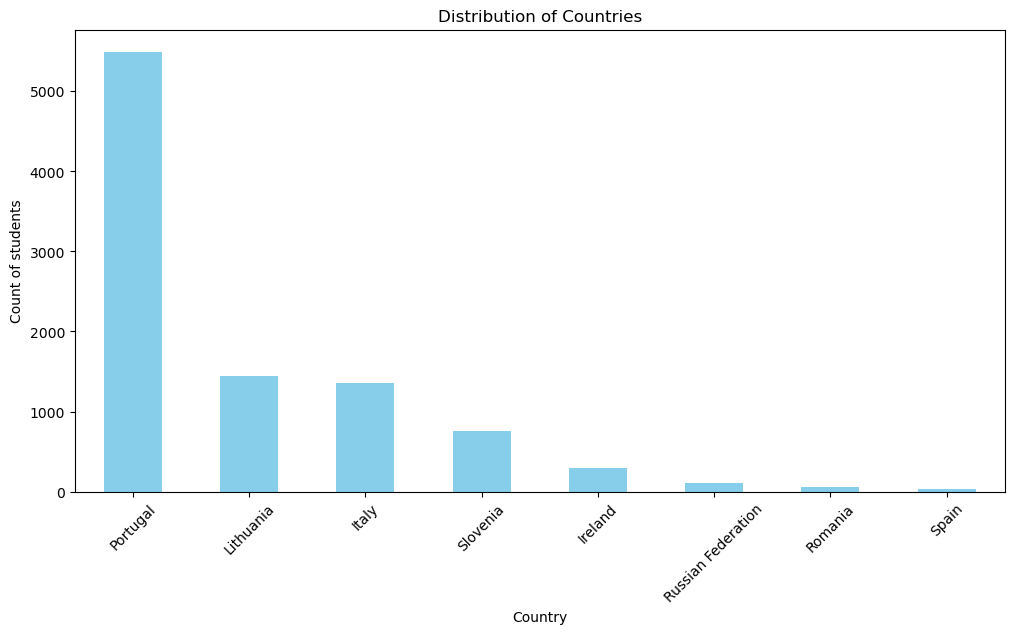

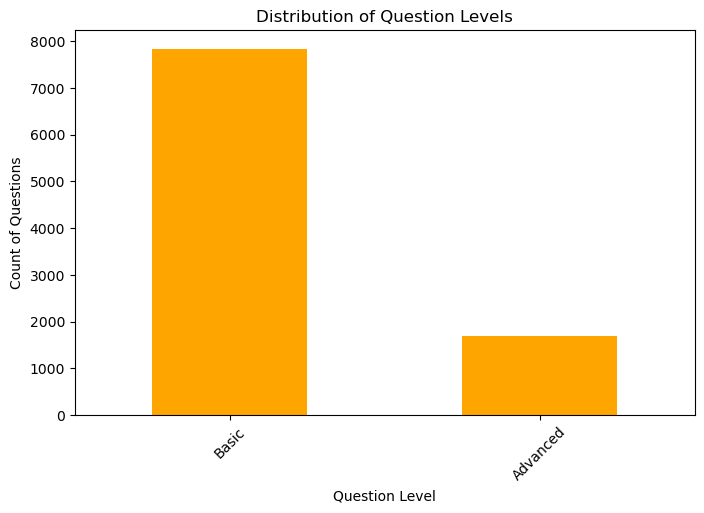

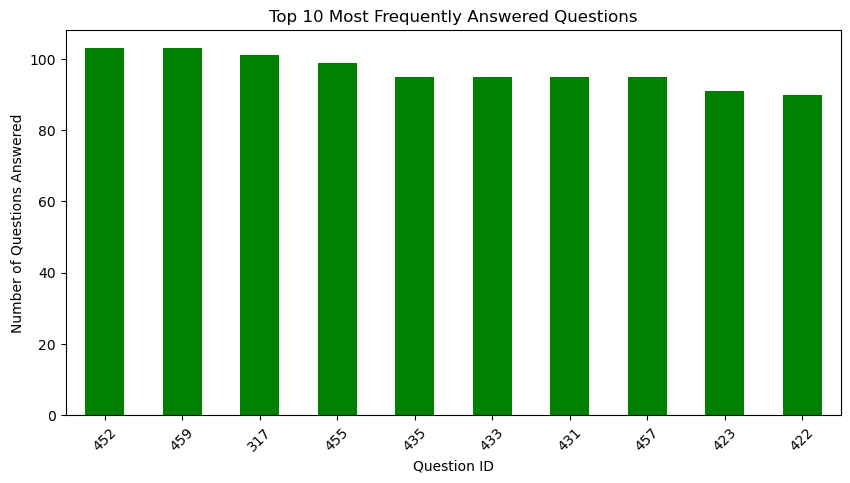

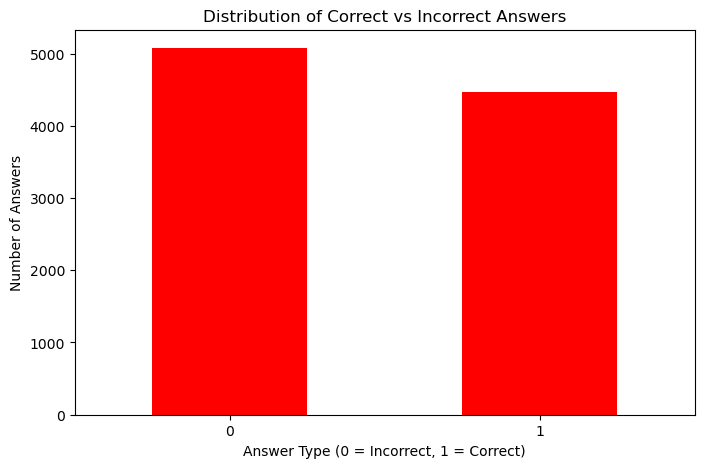

In [6]:
# Plot Distribution of Student Countries
plt.figure(figsize=(12, 6))
df["Student Country"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution of Countries")
plt.xlabel("Country")
plt.ylabel("Count of students")
plt.xticks(rotation=45)

# Plot Distribution of Question Levels
plt.figure(figsize=(8, 5))
df["Question Level"].value_counts().plot(kind="bar", color="orange")
plt.title("Distribution of Question Levels")
plt.xlabel("Question Level")
plt.ylabel("Count of Questions")
plt.xticks(rotation=45)

# Plot Most Frequently Answered Questions
plt.figure(figsize=(10, 5))
df["Question ID"].value_counts().head(10).plot(kind="bar", color="green")
plt.title("Top 10 Most Frequently Answered Questions")
plt.xlabel("Question ID")
plt.ylabel("Number of Questions Answered")
plt.xticks(rotation=45)

# Plot Analysis of Correct vs Incorrect Answers
plt.figure(figsize=(8, 5))
df["Type of Answer"].value_counts().plot(kind="bar", color="red")
plt.title("Distribution of Correct vs Incorrect Answers")
plt.xlabel("Answer Type (0 = Incorrect, 1 = Correct)")
plt.ylabel("Number of Answers")
plt.xticks(rotation=0)


## Data Distribution

3. Generate a plot describing the distribution of your data, think of what machine learning problem could be around,

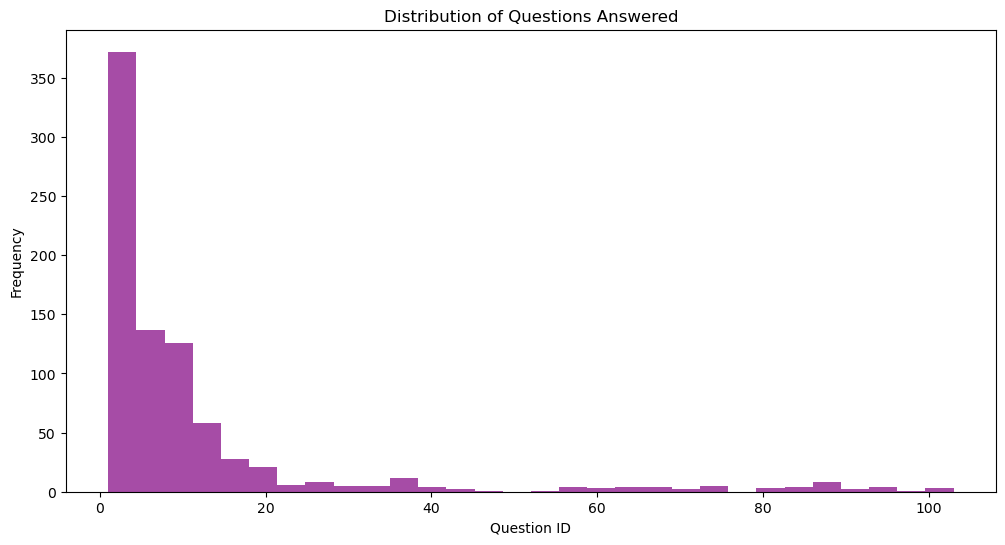

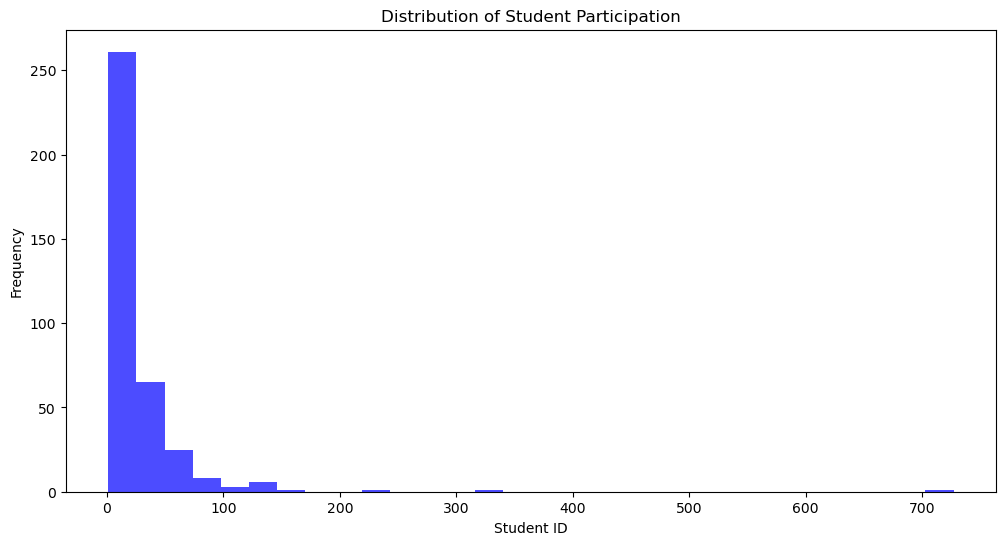

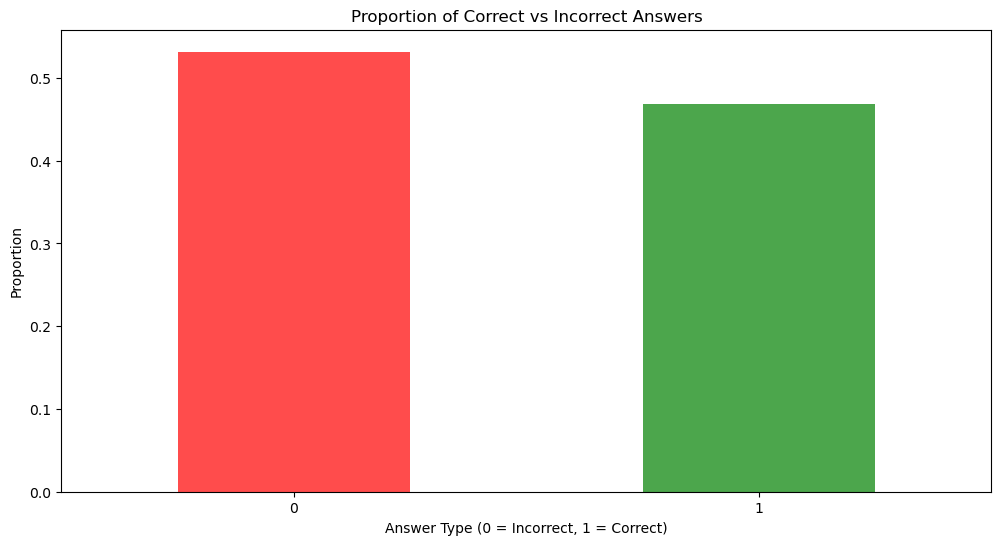

In [7]:
# Plot the distribution of Question IDs to see how frequently each question was answered
plt.figure(figsize=(12, 6))
df["Question ID"].value_counts().plot(kind="hist", bins=30, color="purple", alpha=0.7)
plt.title("Distribution of Questions Answered")
plt.xlabel("Question ID")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of Student IDs to see student participation patterns
plt.figure(figsize=(12, 6))
df["Student ID"].value_counts().plot(kind="hist", bins=30, color="blue", alpha=0.7)
plt.title("Distribution of Student Participation")
plt.xlabel("Student ID")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of correct vs incorrect answers to analyze class balance for ML tasks
plt.figure(figsize=(12, 6))
df["Type of Answer"].value_counts(normalize=True).plot(kind="bar", color=["red", "green"], alpha=0.7)
plt.title("Proportion of Correct vs Incorrect Answers")
plt.xlabel("Answer Type (0 = Incorrect, 1 = Correct)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()


## Story Illustration
4. Generate a series of plots to illustrate to support your story and make your points clear.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Russian Federation'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Lithuania'),
  Text(3, 0, 'Italy'),
  Text(4, 0, 'Portugal'),
  Text(5, 0, 'Ireland'),
  Text(6, 0, 'Romania'),
  Text(7, 0, 'Slovenia')])

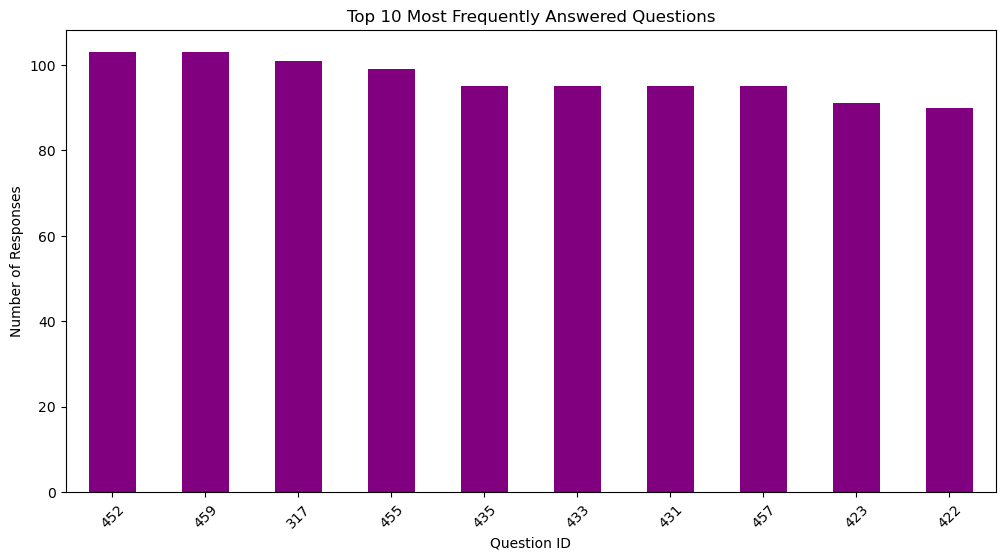

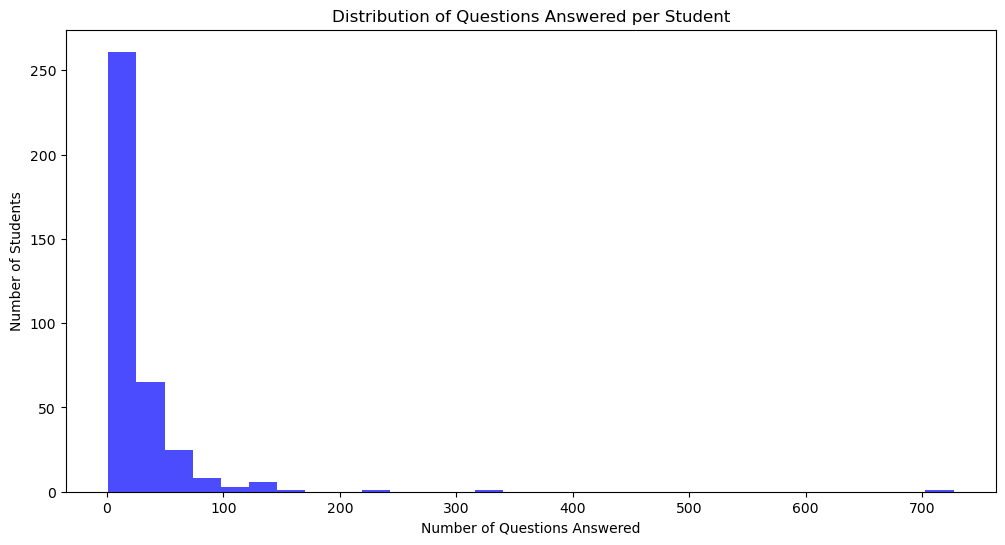

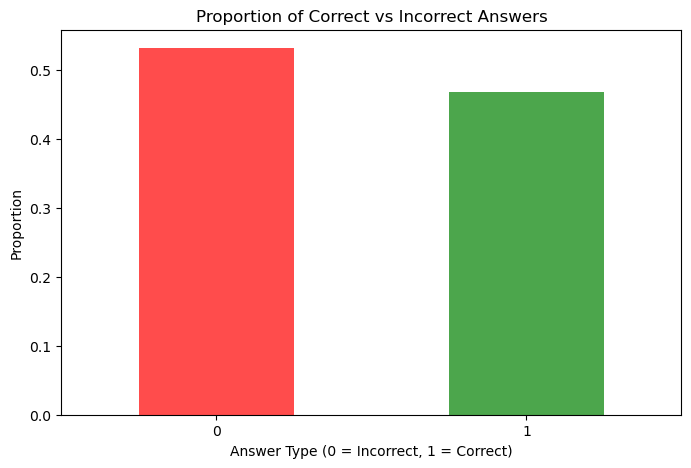

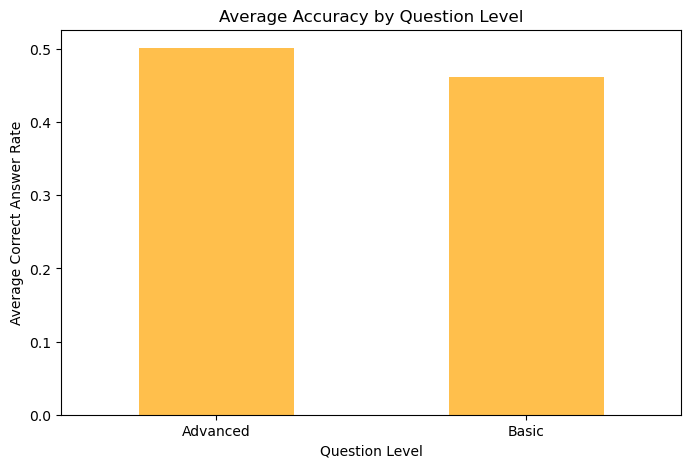

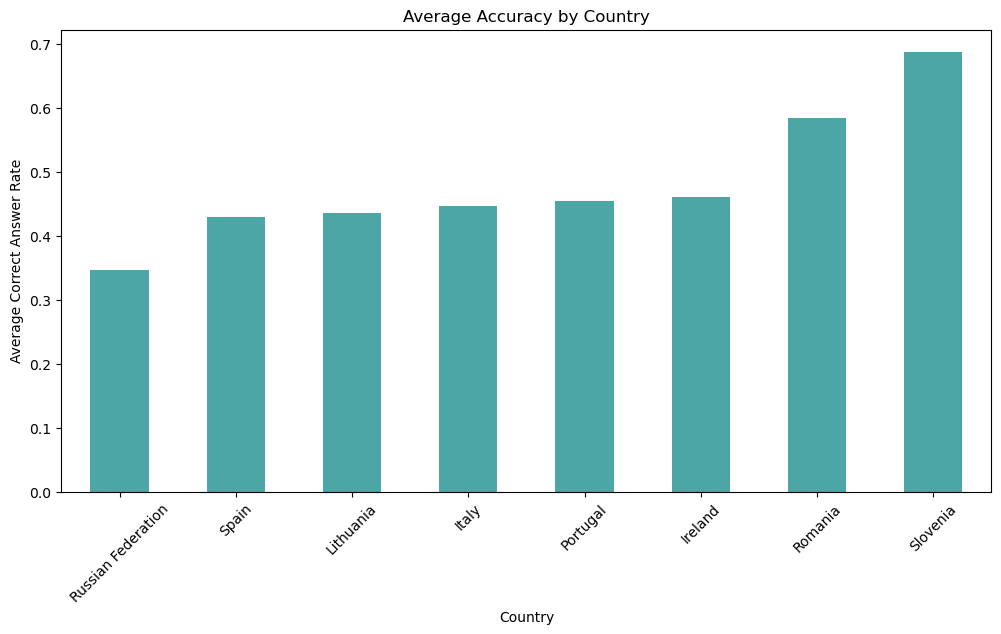

In [8]:
# Plot 1: Question Popularity Prediction - Most Frequently Answered Questions
plt.figure(figsize=(12, 6))
df["Question ID"].value_counts().head(10).plot(kind="bar", color="purple")
plt.title("Top 10 Most Frequently Answered Questions")
plt.xlabel("Question ID")
plt.ylabel("Number of Responses")
plt.xticks(rotation=45)
# plt.show()

# Plot 2: Student Engagement Prediction - Distribution of Number of Questions Answered per Student
plt.figure(figsize=(12, 6))
df["Student ID"].value_counts().plot(kind="hist", bins=30, color="blue", alpha=0.7)
plt.title("Distribution of Questions Answered per Student")
plt.xlabel("Number of Questions Answered")
plt.ylabel("Number of Students")
# plt.show()

# Plot 3: Student Performance Prediction - Correct vs Incorrect Answers Proportion
plt.figure(figsize=(8, 5))
df["Type of Answer"].value_counts(normalize=True).plot(kind="bar", color=["red", "green"], alpha=0.7)
plt.title("Proportion of Correct vs Incorrect Answers")
plt.xlabel("Answer Type (0 = Incorrect, 1 = Correct)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
# plt.show()

# Plot 4: Performance Based on Question Level
plt.figure(figsize=(8, 5))
df.groupby("Question Level")["Type of Answer"].mean().plot(kind="bar", color="orange", alpha=0.7)
plt.title("Average Accuracy by Question Level")
plt.xlabel("Question Level")
plt.ylabel("Average Correct Answer Rate")
plt.xticks(rotation=0)
# plt.show()

# Plot 5: Student Performance by Country
plt.figure(figsize=(12, 6))
df.groupby("Student Country")["Type of Answer"].mean().sort_values().plot(kind="bar", color="teal", alpha=0.7)
plt.title("Average Accuracy by Country")
plt.xlabel("Country")
plt.ylabel("Average Correct Answer Rate")
plt.xticks(rotation=45)
# plt.show()


## key Insights from EDA and use case

- For the Question Popularity Prediction, Some questions are answered more often than others. Recommender systems could suggest frequently answered or trending questions to students.

- for the Student Engagement Prediction, the distribution is skewed to the few students who answered most questions. Models can predict the student engagement and student retention using their answering patterns. 

- For the Student Performance Prediction, the classifier model can ne used to predict whether a student will answer the questions correctly based on given attributes. 

- For Performance Based on Question level, Advanced questions have higher accuracy than the Basic level questions. Adapative learning systems could personalize questions based on the difficulty levels. 

- For Student Performance based on country, Students of different countries performed differently and has big variations. This could be of various reeasons like education system, first language and other factors and can tie up with other external datasets for further exploration. 

# Profile Report using ydata_profiling

In [9]:
try:
    # https://github.com/ydataai/ydata-profiling
    # import pandas_profiling as pp
    from ydata_profiling import ProfileReport
except:
    %conda install -c conda-forge ydata-profiling

# df2.profile_report()
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("data_profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
profile.to_widgets()